# Optimizing Marketing Strategies: A/B Testing for Customer Conversion & Ad Performance

In today's competitive e-commerce landscape, businesses constantly seek innovative ways to increase average order value (AOV) and improve customer conversion rates. One commonly explored strategy is upselling, where customers are encouraged to add additional items to their cart during the checkout process. A crucial question in optimizing this strategy is:

Does displaying a prompt encouraging customers to add a specific product to their order increase sales and overall revenue, or does it negatively impact the user experience?

This project applies A/B testing methodologies to evaluate the effectiveness of such prompts in an online shopping environment. By splitting users into two groups—one that sees the upsell prompt ("Show Prompt" group) and one that does not ("No Prompt" group)—we can measure the impact of this intervention on key e-commerce metrics.

### Objectives of the Study
The primary goal of this project is to analyze whether showing a prompt to add a product to an order has a significant effect on:

- Product Additions: Are customers more likely to add the suggested product to their cart when prompted?
- Total Order Value: Does prompting customers to add an item increase overall purchase amounts?
- Checkout Behavior: Does the prompt influence time spent on the checkout page?
- Conversion Rate: Does showing the prompt impact overall cart abandonment or completed purchases?
- User Segments: How does the effect vary across different customer types (new vs. returning users, mobile vs. desktop users)?

### Methodology
This project will leverage A/B testing principles to conduct a controlled experiment. We will analyze a dataset containing customer interactions with the checkout page, comparing the behavior of users who received the upsell prompt versus those who did not. Using statistical tests (such as chi-square tests for categorical data and t-tests for numerical comparisons), we will determine whether the differences observed are statistically significant.

### Expected Outcomes

By the end of this analysis, we aim to provide data-driven insights on whether displaying an upsell prompt leads to increased sales without negatively impacting customer experience. The findings will help e-commerce businesses make informed decisions about whether to implement such prompts at checkout.

Columns:
- User_ID – Unique identifier for each customer.
- Group – "Show Prompt" or "No Prompt" (A/B testing groups).
- Session_Date – Timestamp of the session.
- Existing_Cart_Value – Value ($) of items already in the cart before seeing the prompt.
- Prompted_Product_Price – Price ($) of the suggested product.
- Added_Product – 1 if the user added the suggested product, 0 if not.
- Total_Order_Value – Total purchase value, including existing cart value and any additional items purchased.
- Conversion – 1 if the user completed the purchase, 0 if they abandoned the cart.
- Time_Spent_on_Checkout_Page (seconds) – Duration of checkout session.
- Device_Type – Mobile, Desktop, or Tablet.
- Returning_Customer – 1 if the user is a repeat customer, 0 if first-time visitor.

<br>

## 0. Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene

<br>

## 1. Get the data

In [3]:
df = pd.read_csv('../data/raw/prompt-ab-data.csv', index_col=0)

<br>

## 2. Exploratory Data Analysis

### 2.1 Quick glance at the data

In [4]:
df.head()

,User_ID,Group,Session_Date,Existing_Cart_Value,Prompted_Product_Price,Added_Product,Total_Order_Value,Conversion,Time_Spent_on_Checkout_Page,Device_Type,Returning_Customer
Unnamed: 0,,,,,,,,,,,
0,1,Show Prompt,2024-01-01 00:00:00,52.77,33.307629,0,34.80,1,55.138018,Mobile,0
1,2,No Prompt,2024-01-01 01:00:00,111.74,79.255223,0,117.39,1,145.000000,Mobile,1
2,3,No Prompt,2024-01-01 02:00:00,164.49,26.469449,0,177.69,1,5.020883,Mobile,0
3,4,No Prompt,2024-01-01 03:00:00,148.64,1.000000,0,135.02,1,1.740193,Mobile,0
4,5,Show Prompt,2024-01-01 04:00:00,158.39,41.795204,0,160.90,1,117.000000,Desktop,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User_ID                      1000 non-null   int64  
 1   Group                        1000 non-null   object 
 2   Session_Date                 1000 non-null   object 
 3   Existing_Cart_Value          1000 non-null   float64
 4   Prompted_Product_Price       1000 non-null   float64
 5   Added_Product                1000 non-null   int64  
 6   Total_Order_Value            1000 non-null   float64
 7   Conversion                   1000 non-null   int64  
 8   Time_Spent_on_Checkout_Page  1000 non-null   float64
 9   Device_Type                  1000 non-null   object 
 10  Returning_Customer           1000 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 93.8+ KB


In [6]:
df.describe()

,User_ID,Existing_Cart_Value,Prompted_Product_Price,Added_Product,Total_Order_Value,Conversion,Time_Spent_on_Checkout_Page,Returning_Customer
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,109.078980,38.175538,0.149000,114.738050,0.75700,87.445193,0.404000
std,288.819436,62.020019,20.289987,0.356267,65.399099,0.42911,73.892018,0.490943
min,1.000000,0.490000,1.000000,0.000000,1.030000,0.00000,0.570555,0.000000
25%,250.750000,58.155000,22.976281,0.000000,62.072500,1.00000,17.591456,0.000000
50%,500.500000,109.255000,37.661144,0.000000,114.525000,1.00000,86.534551,0.000000
75%,750.250000,155.235000,53.275911,0.000000,158.867500,1.00000,141.000000,1.000000
max,1000.000000,457.210000,118.171596,1.000000,497.530000,1.00000,619.292186,1.000000


### 2.2 Functions to explore each feature

In [7]:
# Function that returns the value count and frequency of each feature in the dataframe
def value_cnt_norm_cal(df, feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency(%)']
    return ftr_value_cnt_concat

In [8]:
# Function to display general information about each feature
def gen_info_feat(df, feature):
    print(f"Feature: {feature}")
    print('*' * 50)
    
    # Check if the feature is categorical or numeric
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:  # Categorical
        print(f"Description:\n{df[feature].value_counts()}\n")  # Use value_counts instead of describe()
        print(f'Object type: {df[feature].dtype}')
        print('*' * 50)
        
    else:  # Numeric data
        print(f"Description:\n{df[feature].describe()}\n")
        print(f'Object type: {df[feature].dtype}')
        print('*' * 50)

In [9]:
# Function to create a pie chart for each categorical feature
def create_pie_plot(df, feature):
    ratio_size = df[feature].value_counts(normalize=True) * 100
    
    # Convert labels only for binary features (0 → No, 1 → Yes)
    labels = ratio_size.index.to_list()
    labels = ["Yes" if val == 1 else "No" if val == 0 else val for val in labels]
    
    colors = sns.color_palette("flare")[:len(labels)]

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(ratio_size, labels=labels, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, 
           colors=colors, shadow=True, explode=[0.05] * len(labels), textprops={'fontsize':10, 'fontweight': 'bold'})
    ax.set_title(f'Pie Chart of {feature}', fontsize=14, fontweight='bold')
    ax.axis('equal')
    plt.show()
    return

In [10]:
# Function to create a bar plot for each feature
def create_bar_plot(df, feature):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Calculate value counts
    value_counts = value_cnt_norm_cal(df, feature)
    
    # Convert 0/1 labels to "No"/"Yes" if applicable
    value_counts.index = ["Yes" if val == 1 else "No" if val == 0 else val for val in value_counts.index]

    # Create barplot
    palette = sns.color_palette('flare', n_colors=len(value_counts))
    bars = sns.barplot(
        x=value_counts.index, 
        y=value_counts.values[:, 0], 
        palette=palette, 
        hue=value_counts.index, 
        legend=False
    )

    # Add exact values inside bars, centered
    for bar, value in zip(bars.patches, value_counts.values[:, 0]):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position (centered)
            bar.get_height() / 2,  # Y position (centered vertically)
            f'{int(value)}',  # Convert to integer if count is whole number
            ha='center', va='center', fontsize=12, color='white'
        )

    # Formatting
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(fontsize=10, fontweight='bold')
    ax.set_title(f'{feature} Count', fontsize=13, fontweight='bold')
    plt.show()


In [11]:
# Function to create a box plot for each feature
def create_box_plot(df, feature):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create boxplot with 'flare' color
    sns.boxplot(y=df[feature], ax=ax, color=sns.color_palette("flare")[2])

    # Compute statistics
    min_val = df[feature].min()
    q1 = df[feature].quantile(0.25)
    median = df[feature].median()
    q3 = df[feature].quantile(0.75)
    max_val = df[feature].max()

    # Add text annotations at corresponding y-values
    stats = [(min_val, "Min"), (q1, "Q1"), (median, "Median"), (q3, "Q3"), (max_val, "Max")]
    for val, label in stats:
        ax.text(
            0, val, f'{label}: {val:.2f}', ha='center', va='center', fontsize=10, color="black",
            bbox=dict(facecolor="white", alpha=0.9, edgecolor="black", boxstyle="round,pad=0.3")
        )

    # Formatting
    ax.set_ylabel(f'{feature}', fontsize=10, fontweight='bold')
    ax.set_title(f'Box Plot for {feature}', fontsize=13, fontweight='bold')

    plt.show()


In [12]:

# Function to create a histogram plot for each featureimport matplotlib.pyplot as plt
def create_hist_plot(df, feature, bins=10):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Get histogram data
    counts, bin_edges, patches = plt.hist(df[feature], bins=bins, edgecolor='black', density=True)  # Normalize for KDE overlay

    # Generate a gradient color palette
    colors = sns.color_palette("flare", n_colors=len(patches))

    # Apply colors to each bar
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)

    # Add KDE plot
    sns.kdeplot(df[feature], ax=ax, color='black', linewidth=1)

    # Formatting
    plt.title(f'Histogram & KDE Plot for {feature}', fontsize=13, fontweight='bold')
    plt.ylabel('Density', fontsize=10, fontweight='bold')  # Changed from 'Frequency' to 'Density' for KDE compatibility
    plt.xlabel(feature, fontsize=10, fontweight='bold')

    plt.show()



### 2.3 Univariate analysis

#### 2.3.1 Group

In [13]:
gen_info_feat(df, 'Group')

Feature: Group
**************************************************
Description:
Group
Show Prompt    503
No Prompt      497
Name: count, dtype: int64

Object type: object
**************************************************


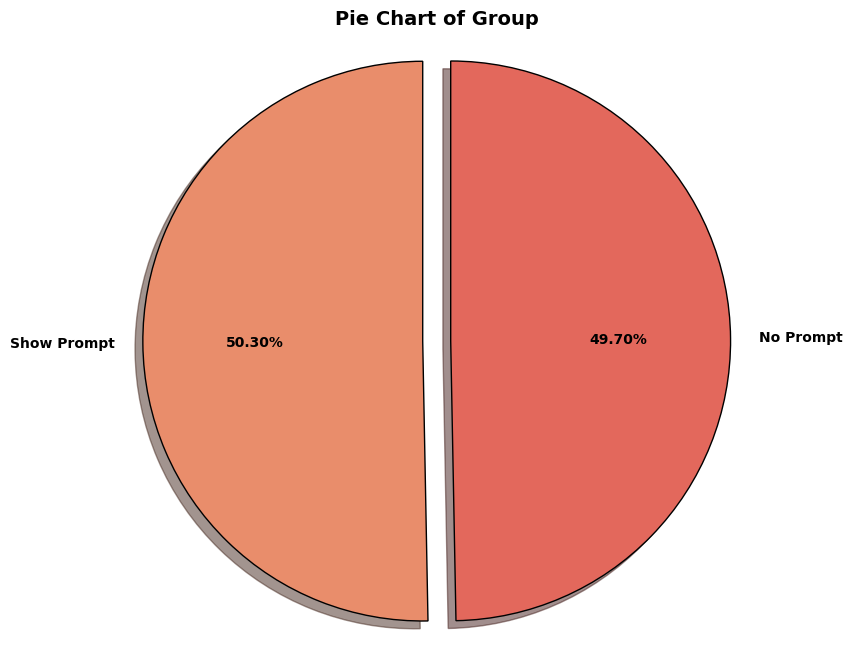

In [14]:
create_pie_plot(df, 'Group')

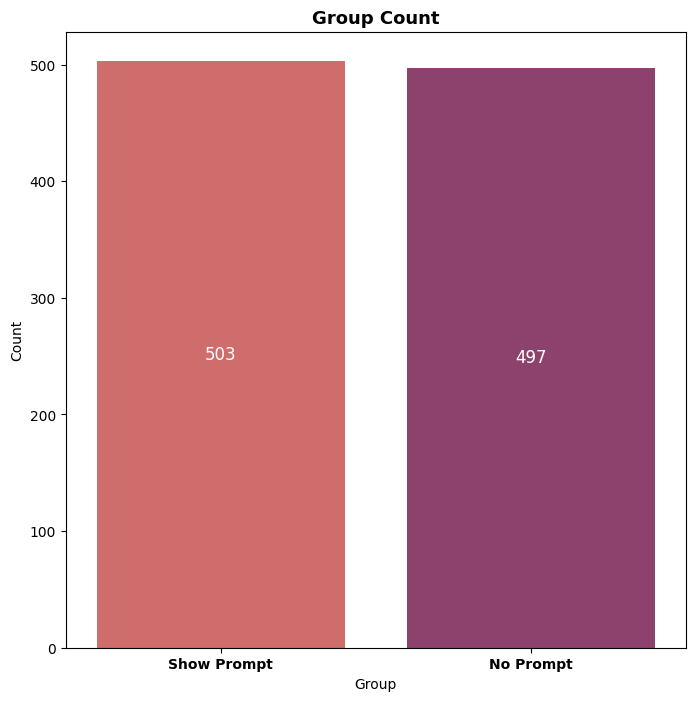

In [15]:
create_bar_plot(df, 'Group')

Interpretation:
- Almost 50/50 split between groups

#### 2.3.2 Existing_Cart_Value

In [16]:
gen_info_feat(df, 'Existing_Cart_Value')

Feature: Existing_Cart_Value
**************************************************
Description:
count    1000.000000
mean      109.078980
std        62.020019
min         0.490000
25%        58.155000
50%       109.255000
75%       155.235000
max       457.210000
Name: Existing_Cart_Value, dtype: float64

Object type: float64
**************************************************


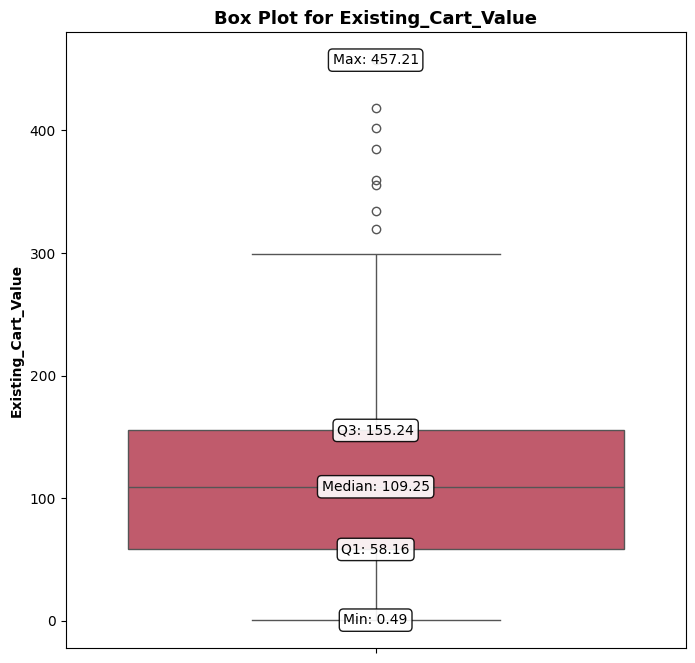

In [17]:
create_box_plot(df, 'Existing_Cart_Value')

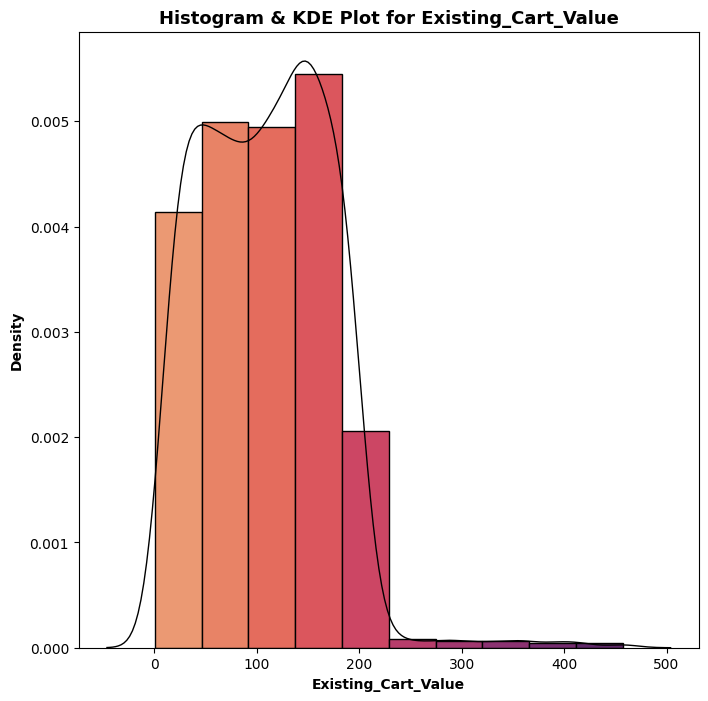

In [18]:
create_hist_plot(df, 'Existing_Cart_Value')

Interpretation:
- Right-Skewed Distribution: The majority of Existing_Cart_Value values are clustered between 0 and 150, with a long tail extending beyond 200.
- The KDE curve confirms the right skew, as it smoothly follows the histogram's trend and drops off towards higher values.
- The presence of a few extreme values (outliers) beyond 300-500 indicates that some users have exceptionally high cart values.

#### 2.3.3 Prompted_Product_Price

In [19]:
gen_info_feat(df, 'Prompted_Product_Price')

Feature: Prompted_Product_Price
**************************************************
Description:
count    1000.000000
mean       38.175538
std        20.289987
min         1.000000
25%        22.976281
50%        37.661144
75%        53.275911
max       118.171596
Name: Prompted_Product_Price, dtype: float64

Object type: float64
**************************************************


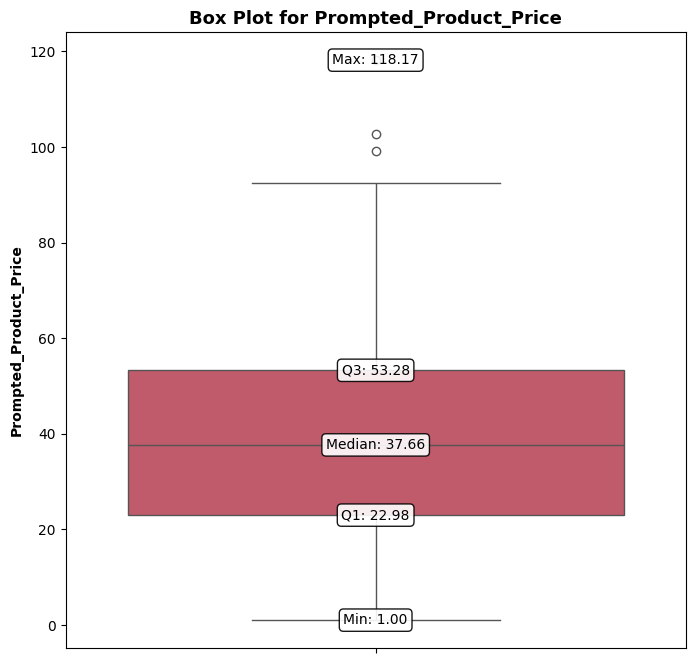

In [20]:
create_box_plot(df, 'Prompted_Product_Price')

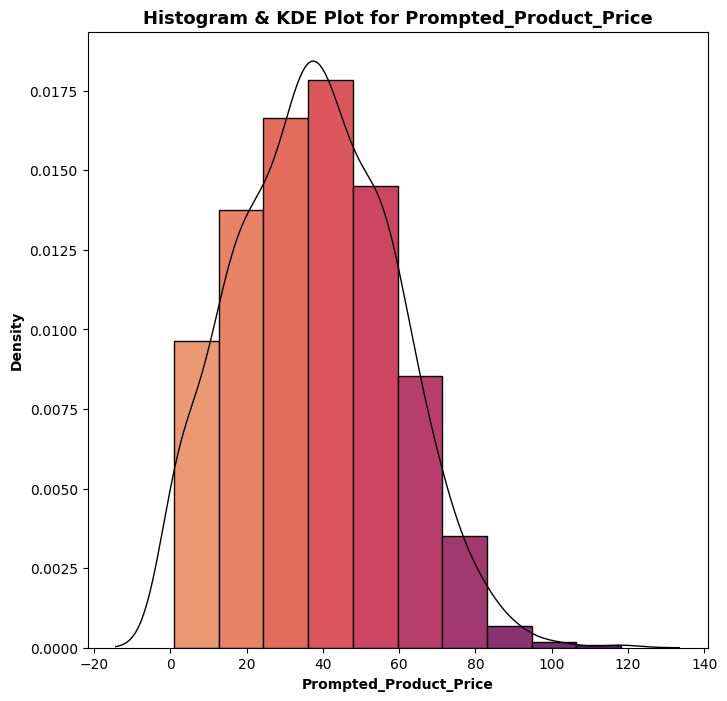

In [21]:
create_hist_plot(df, 'Prompted_Product_Price')

#### 2.3.4 Added_Product

In [22]:
gen_info_feat(df, 'Added_Product')

Feature: Added_Product
**************************************************
Description:
Added_Product
0    851
1    149
Name: count, dtype: int64

Object type: int64
**************************************************


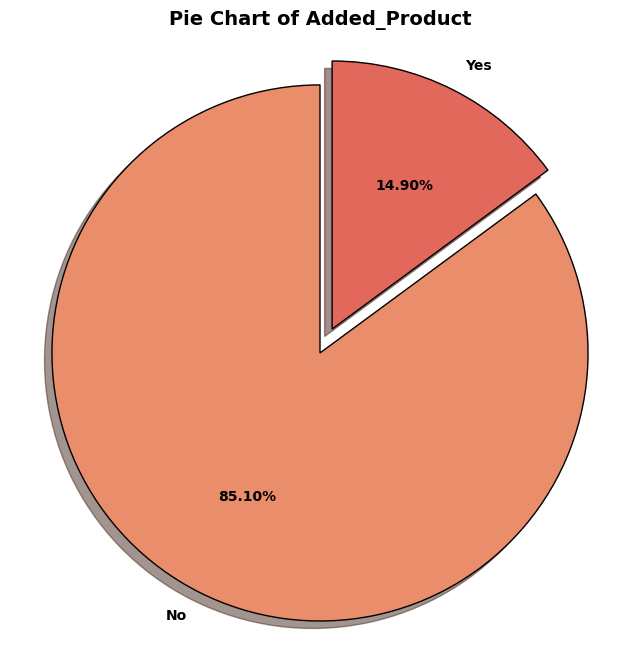

In [23]:
create_pie_plot(df, 'Added_Product')

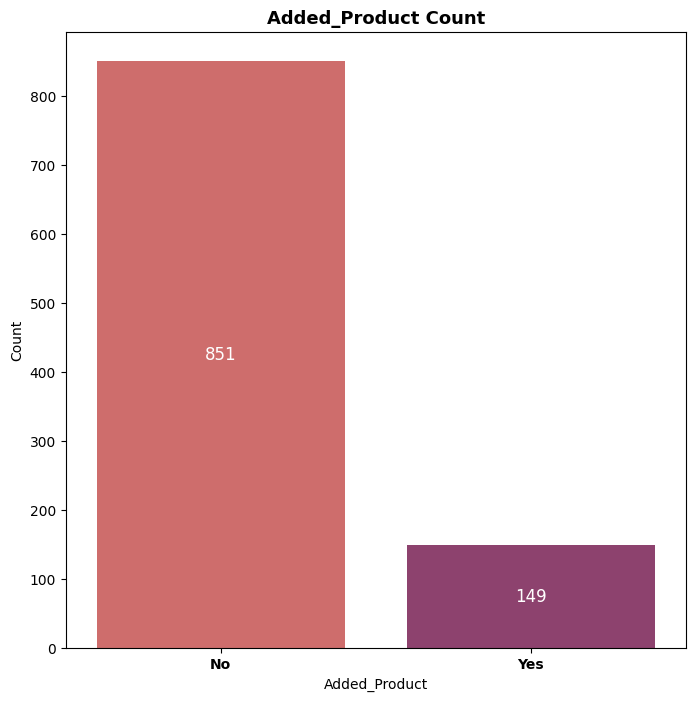

In [24]:
create_bar_plot(df, 'Added_Product')

Interpretation:
- 851 (85%) of the customers declined adding the product, whereas 149 (15%) of the customers added the product

#### 2.3.5 Total_Order_Value

In [25]:
gen_info_feat(df, 'Total_Order_Value')

Feature: Total_Order_Value
**************************************************
Description:
count    1000.000000
mean      114.738050
std        65.399099
min         1.030000
25%        62.072500
50%       114.525000
75%       158.867500
max       497.530000
Name: Total_Order_Value, dtype: float64

Object type: float64
**************************************************


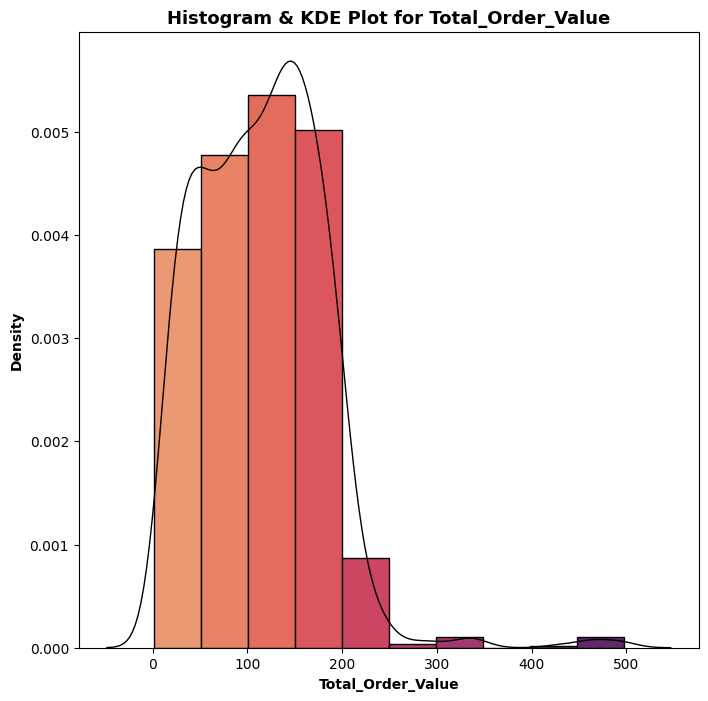

In [26]:
create_hist_plot(df, 'Total_Order_Value')

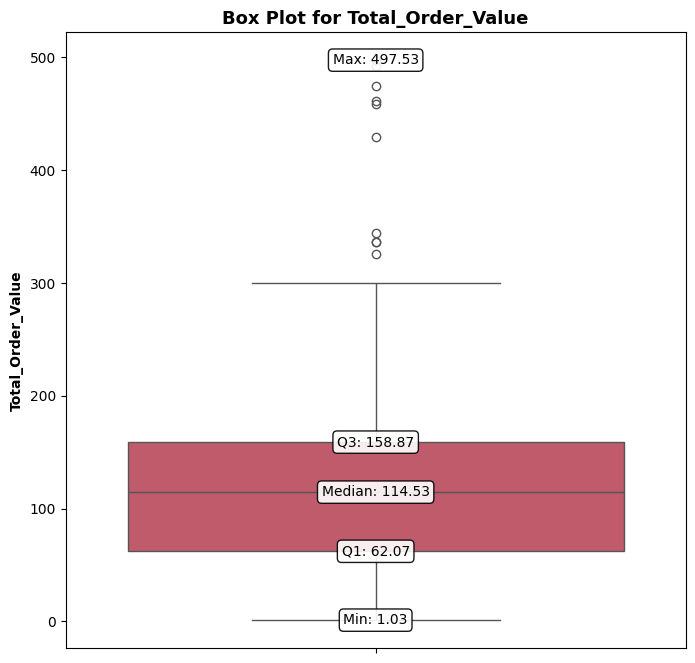

In [27]:
create_box_plot(df, 'Total_Order_Value')

Interpretation:
- The distribution is right-skewed (positively skewed), meaning most orders fall on the lower end of the price range, with a few extremely high values pulling the tail to the right.
- The majority of transactions are below 200, with a sharp drop-off afterward.
- There are a few extreme values (outliers) above 300–500, indicating some high-value transactions.

#### 2.3.6 Conversion

In [28]:
gen_info_feat(df, 'Conversion')

Feature: Conversion
**************************************************
Description:
Conversion
1    757
0    243
Name: count, dtype: int64

Object type: int64
**************************************************


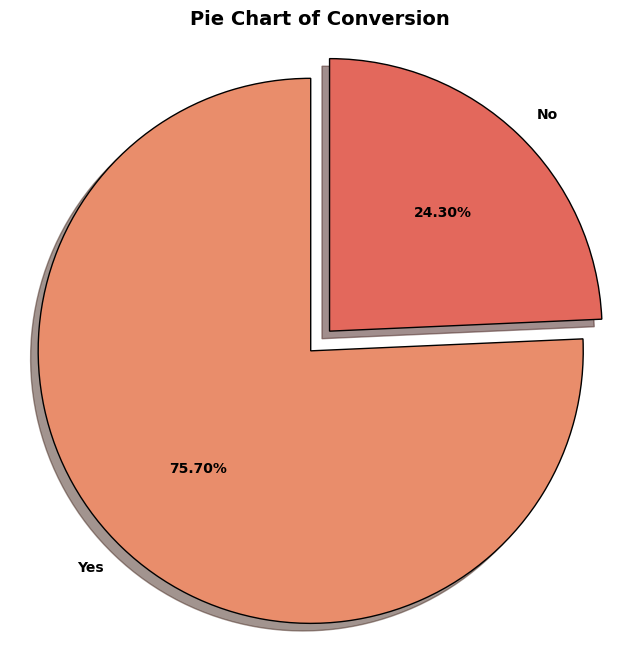

In [29]:
create_pie_plot(df, 'Conversion')

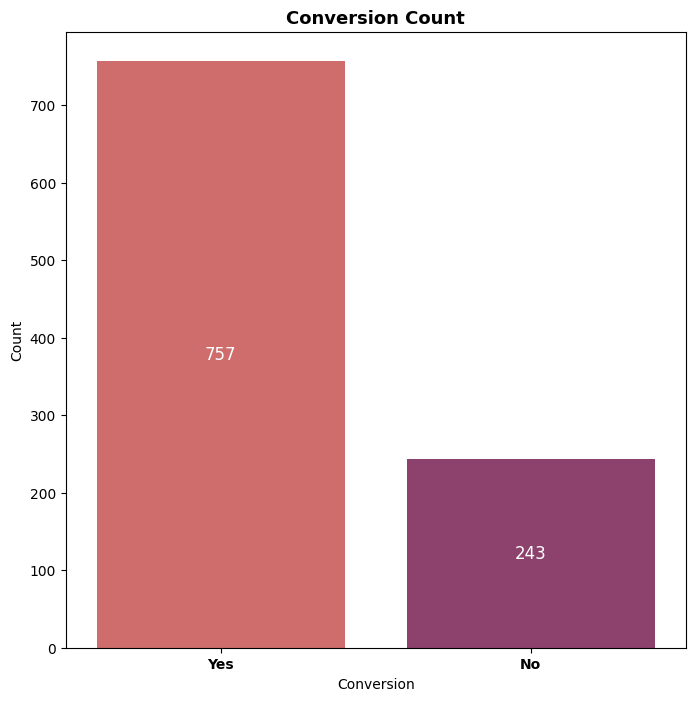

In [30]:
create_bar_plot(df, 'Conversion')

#### 2.3.7 Time_Spent_on_Checkout_Page

In [31]:
gen_info_feat(df, 'Time_Spent_on_Checkout_Page')

Feature: Time_Spent_on_Checkout_Page
**************************************************
Description:
count    1000.000000
mean       87.445193
std        73.892018
min         0.570555
25%        17.591456
50%        86.534551
75%       141.000000
max       619.292186
Name: Time_Spent_on_Checkout_Page, dtype: float64

Object type: float64
**************************************************


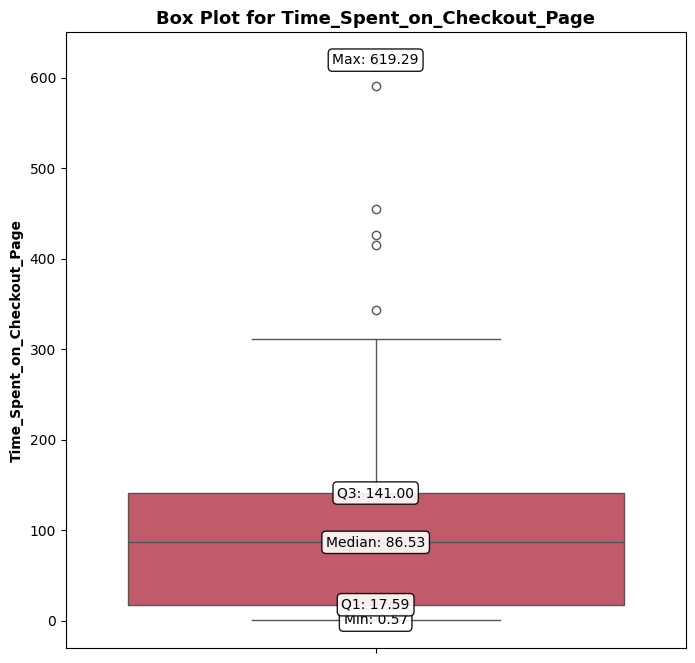

In [32]:
create_box_plot(df, 'Time_Spent_on_Checkout_Page')

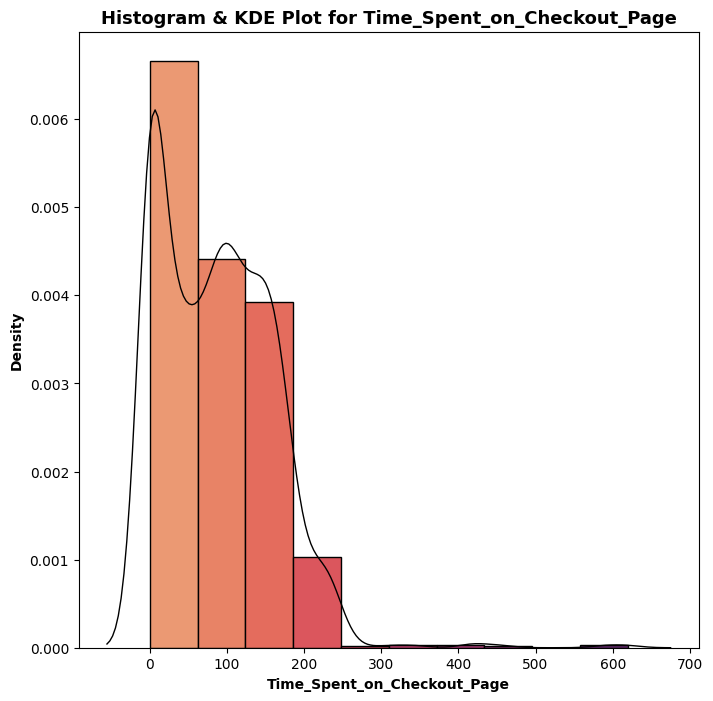

In [33]:
create_hist_plot(df, 'Time_Spent_on_Checkout_Page')

Interpretation:
- Right-skewed distribution, meaning most users spend a short time at checkout, with a few extreme cases spending significantly longer.
- The majority of users complete checkout between 0 and 150 seconds.

#### 2.3.8 Device_Type

In [34]:
gen_info_feat(df, 'Device_Type')

Feature: Device_Type
**************************************************
Description:
Device_Type
Mobile     589
Desktop    357
Tablet      54
Name: count, dtype: int64

Object type: object
**************************************************


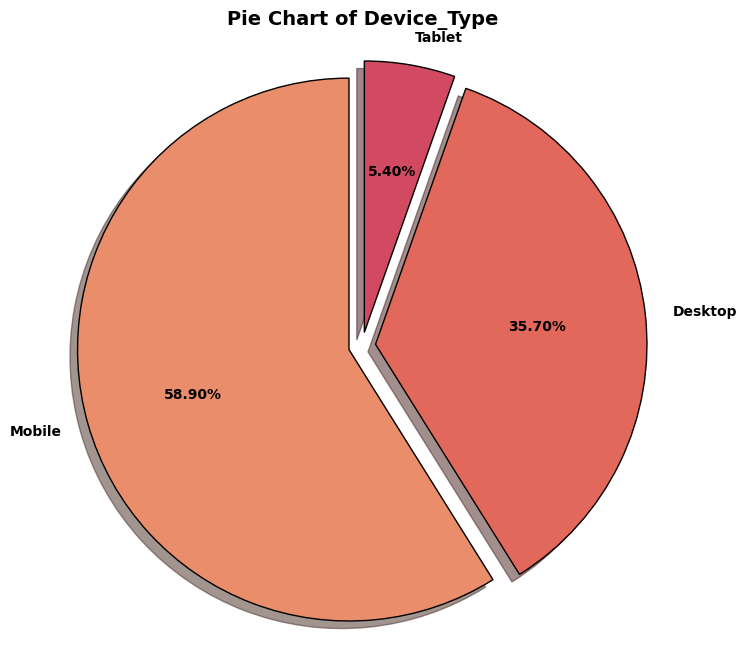

In [35]:
create_pie_plot(df, 'Device_Type')

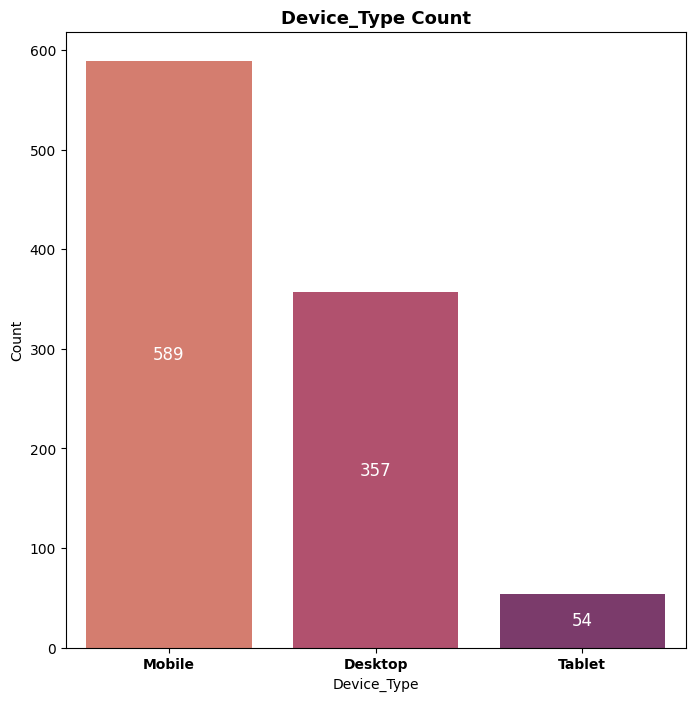

In [36]:
create_bar_plot(df, 'Device_Type')

Interpretation:
- Mobile is the dominant device type: 589 users (~59%) accessed the platform via Mobile.
    - This suggests that most users engage with the platform on mobile devices, which aligns with modern consumer behavior.
- Desktop is the second most common device: 357 (~36) users accessed the platform using a Desktop.
    - A significant portion of users still prefer desktops, possibly for more complex interactions (e.g., detailed browsing, work-related purchases).
- Tablet usage is the lowest: Only 54 (~5) users accessed the platform via Tablet.
    - This suggests that tablets are less commonly used compared to mobile and desktop.

#### 2.3.9 Returning_Customer

In [37]:
gen_info_feat(df, 'Returning_Customer')

Feature: Returning_Customer
**************************************************
Description:
Returning_Customer
0    596
1    404
Name: count, dtype: int64

Object type: int64
**************************************************


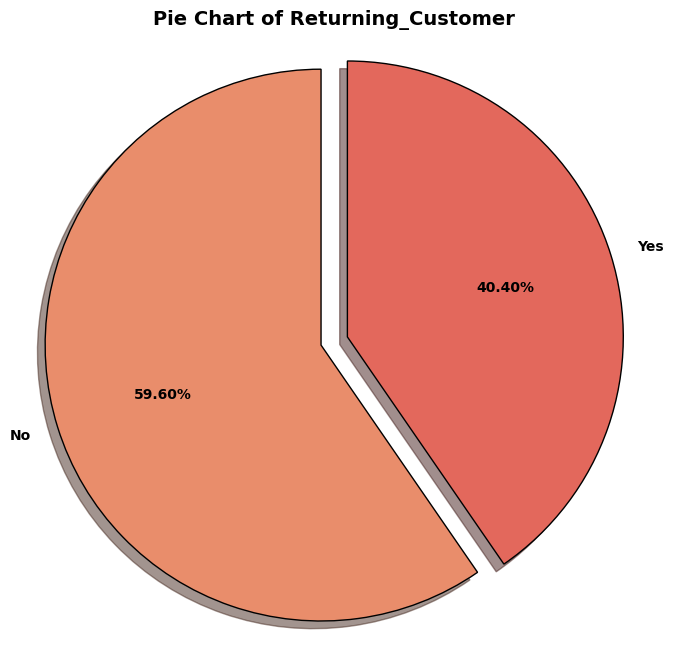

In [38]:
create_pie_plot(df, 'Returning_Customer')

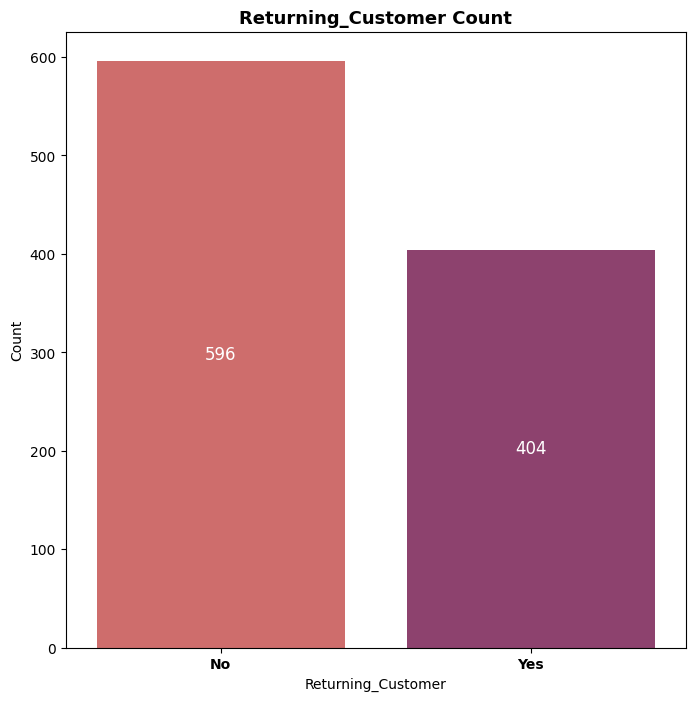

In [39]:
create_bar_plot(df, 'Returning_Customer')

Interpretation:
- 596(~60%) of the customers are returning customers compared to 404 (~40%) customers who are new.
- While there are fewer returning customers, 404 is still a significant number, suggesting some level of customer loyalty.

### 2.4 Bivariate analysis

#### 2.4.1 Numerical vs numerical features(Correlation & Scatter Plots)

##### 2.4.1.1 Scatter plots

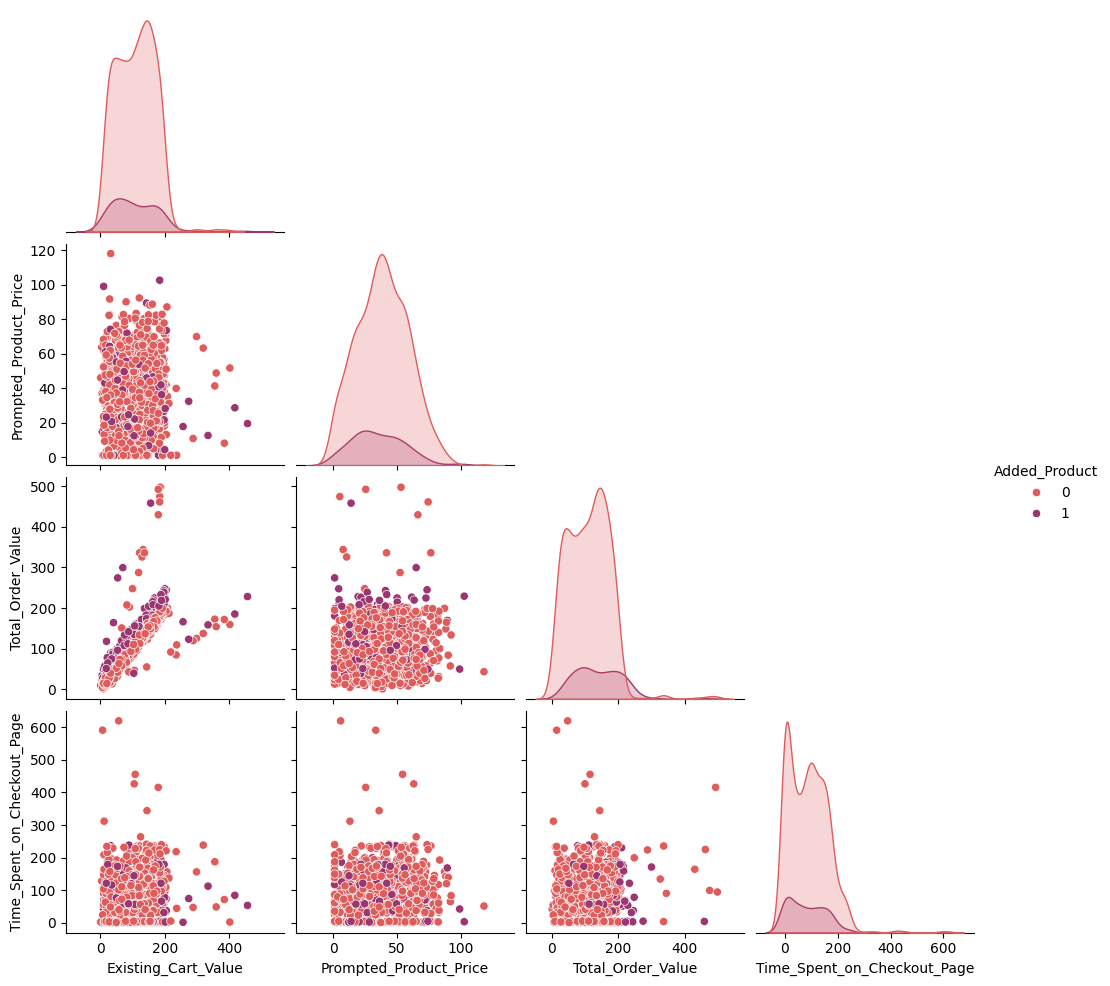

In [40]:
sns.pairplot(df, vars=[
    "Existing_Cart_Value", 
    "Prompted_Product_Price", 
    "Total_Order_Value", 
    "Time_Spent_on_Checkout_Page"
], hue="Added_Product", diag_kind="kde", corner=True, palette='flare')
plt.show()

Interpretation:
- Strong correlation between Total_Order_Value and Existing_Cart_Value
- No trend regarding Prompted_Product_Price and Added_Product
- No trend regarding Time_Spent_on_Checkout_Page and Added_Product

#### 2.4.1.2 Correlation matrix

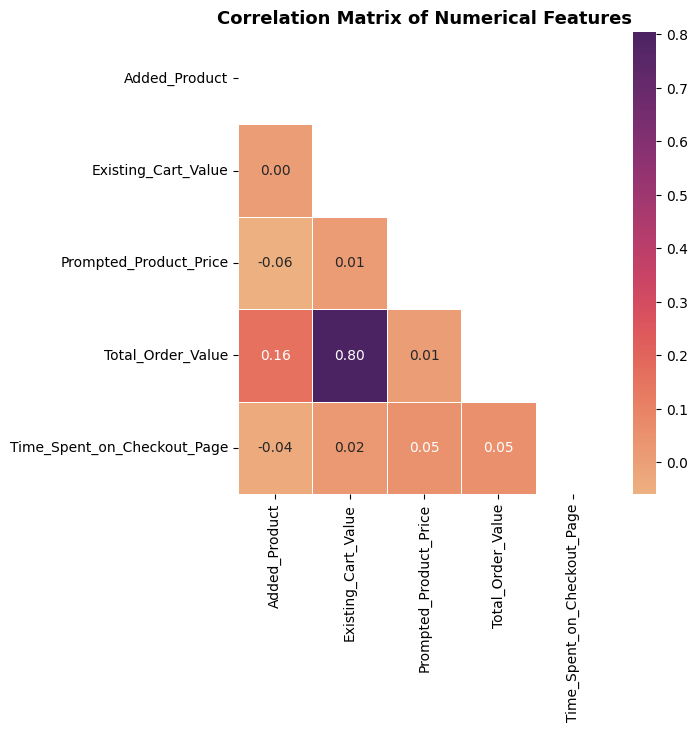

In [41]:
# Select only numerical features for correlation matrix
numerical_features_with_target = ["Added_Product", "Existing_Cart_Value", "Prompted_Product_Price", "Total_Order_Value", "Time_Spent_on_Checkout_Page"]

# Compute the correlation matrix
corr_matrix = df[numerical_features_with_target].corr()

# Create a mask for the upper triangle (to avoid redundancy)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='flare', mask=mask, linewidths=.5, fmt=".2f")

# Set title
plt.title("Correlation Matrix of Numerical Features", fontsize=13, fontweight='bold')

# Show the plot
plt.show()

Interpretation:
- Total_Order_Value has the highest correlation with the target feature, Added_Product but it is a weak positive correlation 
- Prompted_Product_Price has a negative correlation to the target indicating slight price sensitivity

### 2.5 Categorical vs numeric analysis

In [42]:
# Function to plot a numerical feature vs the categorical features
def create_num_cat_subplot(df, numerical_features):
    # Define categorical features to plot against "Total_Order_Value"
    cat_features = ['Group', 'Conversion', 'Device_Type', 'Returning_Customer', 'Added_Product']

    # Create subplots with 3 rows, 5 columns
    fig, axes = plt.subplots(3, 5, figsize=(18, 10), dpi=100)

    # Adjust layout to avoid overlap
    fig.tight_layout(pad=5.0)

    # Flatten axes array for easy indexing
    axes = axes.flatten()

    # Counter to keep track of subplot index
    plot_index = 0

    # Loop through numerical features
    for num_feature in numerical_features:
        # Loop through categorical features and create boxplots
        for cat_feature in cat_features:
            sns.boxplot(ax=axes[plot_index], x=df[cat_feature], y=df[num_feature], palette='flare', hue=df[cat_feature], legend=False)
            axes[plot_index].set_title(f"{cat_feature}", fontsize=10, fontweight='bold')
            axes[plot_index].set_ylabel(num_feature)
            axes[plot_index].set_xlabel('')
            plot_index += 1

    # Hide any unused subplot axes
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])

    # Show the plot
    plt.show()

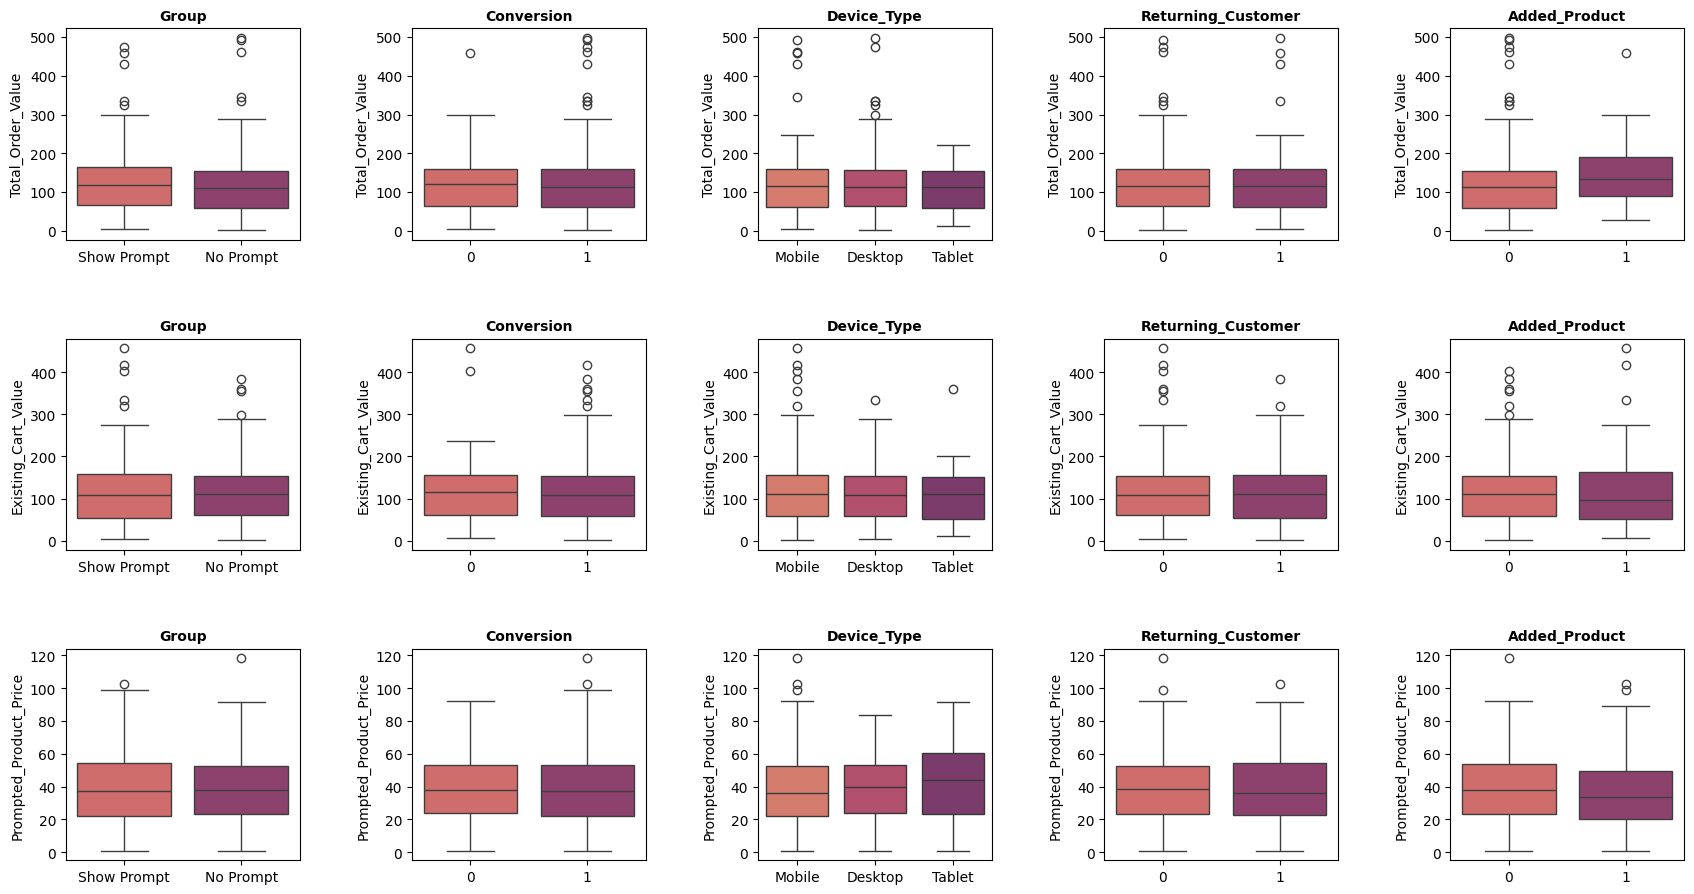

In [43]:
numerical_features = ["Total_Order_Value", "Existing_Cart_Value", "Prompted_Product_Price"]
create_num_cat_subplot(df, numerical_features)

### 2.6 Categorical vs categorical features (Chi-Square)

In [44]:
def perform_chi_square_tests(df, target_variable):
    # Identify categorical columns excluding the target variable itself
    categorical_features = [col for col in df.select_dtypes(include=["object", "category", "int64"]).columns if col != target_variable]

    # Store results
    results = []

    for cat_feature in categorical_features:
        # Create a contingency table
        contingency_table = pd.crosstab(df[cat_feature], df[target_variable])

        # Perform the Chi-Square test
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        # Determine significance
        hypothesis_result = "Significant (Reject H₀)" if p_value < 0.05 else "Not Significant (Fail to Reject H₀)"

        # Append results to list
        results.append({"Categorical Feature": cat_feature, 
                        "Chi-Square Statistic": round(chi2, 4), 
                        "P-Value": round(p_value, 5), 
                        "Degrees of Freedom": dof,
                        "Result": hypothesis_result})

    # Convert results to DataFrame
    chi_square_df = pd.DataFrame(results)

    return chi_square_df

In [45]:
# Run Chi-Square tests on categorical features vs. "Added_Product"
chi_square_results = perform_chi_square_tests(df, "Added_Product")
chi_square_results

,Categorical Feature,Chi-Square Statistic,P-Value,Degrees of Freedom,Result
0,User_ID,1000.0000,0.48513,999,Not Significant (Fail to Reject H₀)
1,Group,170.6713,0.00000,1,Significant (Reject H₀)
2,Session_Date,1000.0000,0.48513,999,Not Significant (Fail to Reject H₀)
3,Conversion,0.3142,0.57514,1,Not Significant (Fail to Reject H₀)
4,Device_Type,0.2397,0.88706,2,Not Significant (Fail to Reject H₀)
5,Returning_Customer,0.0030,0.95612,1,Not Significant (Fail to Reject H₀)


Interpretation:
- Group obviously has a significant impact on Added_Prompt due to either showing the prompt or not.
- The big question will be to determine the value that the prompt produces to determine it's success.

### 2.7 Time series analysis

In [46]:
def create_time_series_plot(df, time_series, numerical_feature, categorical_feature):    
    df_copy = df.copy()
    # Convert 'Session_Date' to datetime format
    df_copy[time_series] = pd.to_datetime(df[time_series])
    
    # Create a new column for weekly bins
    df_copy["Week"] = df_copy[time_series].dt.to_period("W").astype(str)
    
    # Aggregate Total_Order_Value by Week and Group
    weekly_sales = df_copy.groupby(["Week", categorical_feature])[numerical_feature].sum().reset_index()
    
    # Plot the time series line chart
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=weekly_sales, x="Week", y=numerical_feature, hue=categorical_feature, marker="o", palette="flare")
    
    # Formatting the chart
    plt.xticks(rotation=45, fontsize=8)
    plt.title("Weekly Total Order Value by Group (Upsell Prompt vs. No Prompt)", fontsize=13, fontweight="bold")
    plt.xlabel("Week")
    plt.ylabel(f"{numerical_feature}($)")
    plt.legend(title="Group")
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Show the plot
    plt.show()

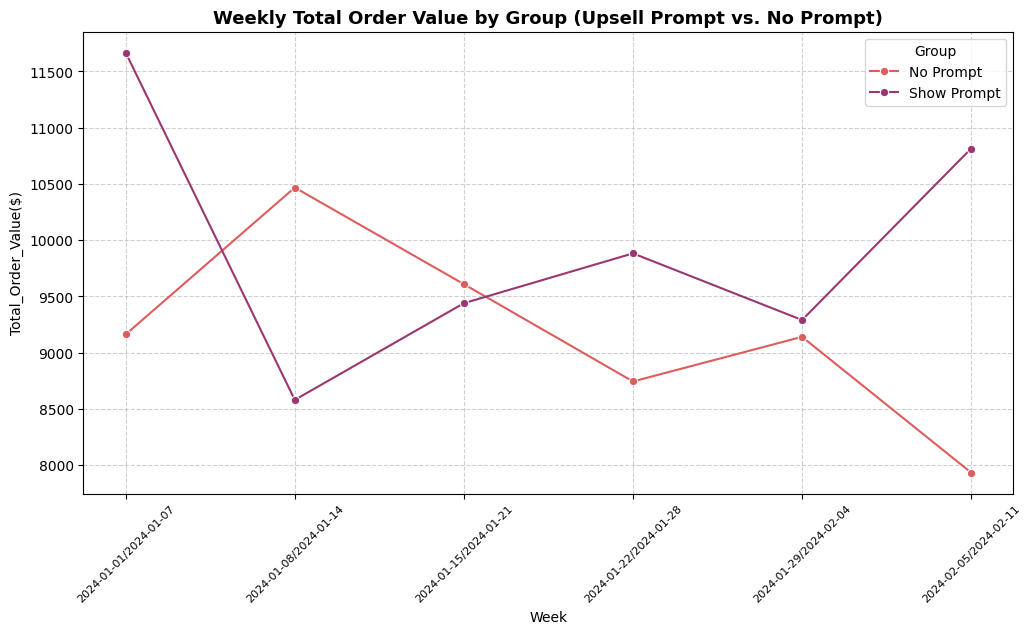

In [47]:
create_time_series_plot(df, 'Session_Date', 'Total_Order_Value', 'Group')

Interpretation:
- Prompt adaptation saw an increase after an initial drop in revenue suggesting improved user adaptation or upsell targeting
- Prompt performs better over time
- There was an initial hesitency of user adaptation to the prompt leading to an increase in revenue

<br>

## 3. Data cleaning

### 3.1 Outlier removal

In [48]:
def remove_outliers(df, features, threshold=1.5):
    if not set(features).issubset(df.columns):
        print("One or more specified features are not in the dataframe.")
        return df

    # Compute Q1, Q3, and IQR for each feature
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter out outliers
    df_cleaned = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]

    return df_cleaned

In [49]:
numerical_features = ['Existing_Cart_Value', 'Total_Order_Value', 'Prompted_Product_Price']
df_cleaned = remove_outliers(df, numerical_features, threshold=1.5)

### 3.2 Save cleaned dataset

In [50]:
df_cleaned.to_csv("../data/processed/cleaned_prompt_data.csv", index=False)

<br>

## 4. Statistical Analysis & Hypothesis Testing

### 4.1 Test for variance

In [51]:
def perform_levene_tests(df, numerical_col):
    # Identify categorical columns
    categorical_features = ['Group', 'Conversion', 'Device_Type', 'Returning_Customer', 'Added_Product']

    # Store results
    results = []

    for cat_feature in categorical_features:
        unique_groups = df[cat_feature].unique()
        group_data = [df[df[cat_feature] == group][numerical_col].dropna() for group in unique_groups]

        # Ensure there are at least two groups with data before performing the test
        if len(group_data) > 1:
            stat, p_value = levene(*group_data)
            hypothesis_result = "Equal Variance" if p_value > 0.05 else "Unequal Variance"
            results.append({"Categorical Variable": cat_feature, 
                            "Levene's Test Statistic": round(stat, 4), 
                            "P-Value": round(p_value, 5), 
                            "Result": hypothesis_result})

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [52]:
perform_levene_tests(df_cleaned, 'Existing_Cart_Value')

,Categorical Variable,Levene's Test Statistic,P-Value,Result
0,Group,0.4914,0.48347,Equal Variance
1,Conversion,0.0291,0.86469,Equal Variance
2,Device_Type,0.0850,0.91849,Equal Variance
3,Returning_Customer,1.7232,0.18959,Equal Variance
4,Added_Product,2.5387,0.11141,Equal Variance


In [53]:
perform_levene_tests(df_cleaned, 'Total_Order_Value')

,Categorical Variable,Levene's Test Statistic,P-Value,Result
0,Group,1.1691,0.27984,Equal Variance
1,Conversion,0.4644,0.49573,Equal Variance
2,Device_Type,0.0558,0.94572,Equal Variance
3,Returning_Customer,1.6699,0.19658,Equal Variance
4,Added_Product,4.6593,0.03113,Unequal Variance


In [54]:
perform_levene_tests(df_cleaned, 'Prompted_Product_Price')

,Categorical Variable,Levene's Test Statistic,P-Value,Result
0,Group,2.9130,0.08818,Equal Variance
1,Conversion,0.6513,0.41983,Equal Variance
2,Device_Type,2.8288,0.05957,Equal Variance
3,Returning_Customer,1.3281,0.24943,Equal Variance
4,Added_Product,0.0380,0.84552,Equal Variance


### 4.2 Anova tests

In [55]:
def perform_anova_for_groups(df, numerical_features):
    categorical_feature = "Group"  # Fixed to 'Group' since it's the only non-binary categorical variable

    # Ensure the categorical feature is converted to category type if it's not already
    df[categorical_feature] = df[categorical_feature].astype('category')

    # Store results
    results = []

    for num_feature in numerical_features:
        # Get unique groups from the categorical feature
        groups = df[categorical_feature].unique()

        # Create a list of numerical values per category
        numerical_groups = [df[df[categorical_feature] == group][num_feature].dropna() for group in groups]

        # Perform ANOVA test only if there are at least two valid groups
        if len(numerical_groups) > 1:
            f_stat, p_value = stats.f_oneway(*numerical_groups)
            hypothesis_result = "No significant difference (Fail to Reject H₀)" if p_value > 0.05 else "Significant difference (Reject H₀)"

            # Append results to list
            results.append({"Numerical Feature": num_feature,
                            "Categorical Variable": categorical_feature,
                            "F-Statistic": round(f_stat, 4),
                            "P-Value": round(p_value, 5),
                            "Result": hypothesis_result})

    # Convert results to DataFrame
    anova_df = pd.DataFrame(results)

    return anova_df

In [56]:
numerical_features = ["Total_Order_Value", "Existing_Cart_Value", "Prompted_Product_Price"]
anova_results = perform_anova_for_groups(df, numerical_features)
display(anova_results)  # To visualize results in a table format

,Numerical Feature,Categorical Variable,F-Statistic,P-Value,Result
0,Total_Order_Value,Group,3.6172,0.05747,No significant difference (Fail to Reject H₀)
1,Existing_Cart_Value,Group,0.0027,0.95828,No significant difference (Fail to Reject H₀)
2,Prompted_Product_Price,Group,0.0389,0.84360,No significant difference (Fail to Reject H₀)


### 4.2.3 T-tests

In [57]:
# Function to perform a t-test comparing a numerical feature against our binary target variable, i.e. "Added_Product" and adding them to a dataframe
def t_test_categoricals(df, numerical_col):
    results = []

    # Identify categorical columns with only two unique values (binary variables)
    binary_categoricals = [col for col in df.select_dtypes(include=["object", "category", "int"]).columns 
                           if df[col].nunique() == 2]

    # Iterate through each binary categorical column and perform t-test
    for cat_col in binary_categoricals:
        group1 = df[df[cat_col] == df[cat_col].unique()[0]][numerical_col]
        group2 = df[df[cat_col] == df[cat_col].unique()[1]][numerical_col]

        # Perform Welch's t-test (accounts for unequal variances)
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

        # Determine hypothesis test result
        hypothesis_result = "Reject H₀" if p_value < 0.05 else "Fail to Reject H₀"

        # Append results to list
        results.append({"Categorical Variable": cat_col, 
                        "T-Statistic": round(t_stat, 4), 
                        "P-Value": round(p_value, 5), 
                        "Hypothesis Test Result": hypothesis_result})

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    return results_df

#### 4.2.3.1 Total_Order_Value

In [58]:
t_test_categoricals(df, 'Total_Order_Value')

,Categorical Variable,T-Statistic,P-Value,Hypothesis Test Result
0,Group,1.9022,0.05744,Fail to Reject H₀
1,Added_Product,-4.8539,0.00000,Reject H₀
2,Conversion,-0.3813,0.70318,Fail to Reject H₀
3,Returning_Customer,-0.0186,0.98519,Fail to Reject H₀


#### 4.2.3.2 Existing_Cart_Value

In [59]:
t_test_categoricals(df, 'Existing_Cart_Value')

,Categorical Variable,T-Statistic,P-Value,Hypothesis Test Result
0,Group,-0.0523,0.95826,Fail to Reject H₀
1,Added_Product,-0.0795,0.93675,Fail to Reject H₀
2,Conversion,-0.6714,0.50234,Fail to Reject H₀
3,Returning_Customer,0.1901,0.84924,Fail to Reject H₀


#### 4.2.3.3 Prompted_Product_Price

In [60]:
t_test_categoricals(df, 'Prompted_Product_Price')

,Categorical Variable,T-Statistic,P-Value,Hypothesis Test Result
0,Group,0.1974,0.84354,Fail to Reject H₀
1,Added_Product,1.8409,0.06710,Fail to Reject H₀
2,Conversion,-0.4561,0.64855,Fail to Reject H₀
3,Returning_Customer,0.0544,0.95665,Fail to Reject H₀


Interpretation:
- The strong negative T-statistic (-4.8539) and extremely low p-value indicate a significant difference in Total Order Value for users who accepted vs. rejected the upsell.
    - Compare the average Total Order Value for users who accepted vs. declined the upsell.

### 4.2.4 Bayesian A/B testing

In [61]:
# Define the Bayesian A/B testing function
def bayesian_ab_test(group_a_data, group_b_data, simulations=10000):
    """
    Performs a Bayesian A/B test using bootstrapped sampling to estimate the probability 
    that Group B is better than Group A (e.g., higher Total Order Value).

    Parameters:
    group_a_data (array-like): Numerical data for Group A (e.g., No Prompt).
    group_b_data (array-like): Numerical data for Group B (e.g., Show Prompt).
    simulations (int): Number of bootstrap simulations (default = 10,000).

    Returns:
    dict: Posterior probabilities and summary statistics.
    """
    a_samples = np.random.choice(group_a_data, size=(simulations, len(group_a_data)), replace=True).mean(axis=1)
    b_samples = np.random.choice(group_b_data, size=(simulations, len(group_b_data)), replace=True).mean(axis=1)

    # Probability that Group B is better than Group A
    prob_b_better = np.mean(b_samples > a_samples)
    uplift = b_samples - a_samples

    results = {
        "Probability B > A": round(prob_b_better * 100, 2),
        "Mean Uplift ($)": round(np.mean(uplift), 2),
        "95% CI for Uplift": (round(np.percentile(uplift, 2.5), 2), round(np.percentile(uplift, 97.5), 2)),
        "Est. Revenue Gained from Prompt": round(round(np.mean(uplift), 2) * len(df_cleaned), 2)
    }

    return results

In [62]:
# Prepare group data from the dataset
group_a = df_cleaned[df_cleaned["Group"] == "No Prompt"]["Total_Order_Value"].values
group_b = df_cleaned[df_cleaned["Group"] == "Show Prompt"]["Total_Order_Value"].values

# Run the Bayesian A/B test
bayesian_results = bayesian_ab_test(group_a, group_b)
bayesian_results

{'Probability B > A': 98.31,
 'Mean Uplift ($)': 7.75,
 '95% CI for Uplift': (0.59, 14.99),
 'Est. Revenue Gained from Prompt': 7587.25}

<br>

## 5. Business findings

- The upsell prompt is successful in increasing order value 98.25% of the time. 
- The average upsale value is $7.74 with a 95% confidence interval of %0.60 to $14.86.
- Estimated revenue impact based on the current dataset would be +$7,577.46.
- Statistical tests found no significant drop in conversion rates or an increase in car abandonment for users who were shown the prompt.

### 5.1 Recomendations

- Roll out the upsell prompt to all users.
- It's statistically and practically effective, with high confidence of increasing revenue.
- The expected uplift of $7.74 per user scales into thousands in additional earnings.
- Future iterations can test prompt placement, product targeting, and personalization to increase effectiveness even further.

Copyright @JoshTilton 2025